In [73]:
import datetime
import os.path
import pickle
from utility import load_categories, cp_to_date,load_appliance_time,merge_overlapping_intervals,load_daily_activity_dic, plot_activity, load_activity_dic
from datetime import timedelta
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
import os
plt.rcParams['font.family'] = 'Times New Roman'

from datetime import timedelta
warnings.filterwarnings("ignore")

In [74]:
def time_lst_to_dic(lst):
    date_dict = {}
    for start, end in lst:
        if start.date()<pd.to_datetime("2014-8-01 00:00:00"):
            date = start.date()  # 获取日期部分
            if date not in date_dict:
                date_dict[date] = []
            date_dict[date].append((start, end))
    return date_dict

In [75]:
activity_path = r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\activity_120'

activity = load_activity_dic(activity_path, ['cooking','cleaning','entertainment',"working"])

In [76]:
activity

{'cooking': [(Timestamp('2013-05-01 06:26:30', freq='30S'),
   Timestamp('2013-05-01 07:53:30', freq='30S')),
  (Timestamp('2013-05-01 12:08:00', freq='30S'),
   Timestamp('2013-05-01 13:36:00', freq='30S')),
  (Timestamp('2013-05-01 15:34:30', freq='30S'),
   Timestamp('2013-05-01 15:35:30', freq='30S')),
  (Timestamp('2013-05-01 17:03:30', freq='30S'),
   Timestamp('2013-05-01 18:48:30', freq='30S')),
  (Timestamp('2013-05-02 06:49:30', freq='30S'),
   Timestamp('2013-05-02 07:29:00', freq='30S')),
  (Timestamp('2013-05-02 11:50:00', freq='30S'),
   Timestamp('2013-05-02 11:52:00', freq='30S')),
  (Timestamp('2013-05-02 14:14:00', freq='30S'),
   Timestamp('2013-05-02 14:32:00', freq='30S')),
  (Timestamp('2013-05-02 17:34:00', freq='30S'),
   Timestamp('2013-05-02 18:27:00', freq='30S')),
  (Timestamp('2013-05-02 19:39:30', freq='30S'),
   Timestamp('2013-05-02 19:56:00', freq='30S')),
  (Timestamp('2013-05-03 06:37:00', freq='30S'),
   Timestamp('2013-05-03 06:38:30', freq='30S')),

In [77]:
# activity_dic = {}
# for activity_name, activity_time_lst in activity.items():
#     activity_dic[activity_name] = [(start, end) for start, end in activity_time_lst if start<]
# activity = activity_dic

In [78]:
appliance_path = r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\time_data\cooking'
appliance_time = load_appliance_time(appliance_path,['kettle','breadmaker',"gas","microwave","toaster"])

In [79]:
appliance_time_dic = {}

for appliance_name, appliance_time_lst in appliance_time.items():
    appliance_time_dic[appliance_name] = time_lst_to_dic(appliance_time_lst)

In [80]:
file_path=r'C:\annoticity-master (2)\anno\datasets\UK_DALE\ukdale.h5'
appliance_level_consumption = load_categories(file_path, [10,11,13,16,42], ["kettle", "toaster",'microwave',"breadmaker","gas"], 'active')

HDF5ExtError: HDF5 error back trace

  File "C:\ci\hdf5_1655191106204\work\src\H5F.c", line 620, in H5Fopen
    unable to open file
  File "C:\ci\hdf5_1655191106204\work\src\H5VLcallback.c", line 3502, in H5VL_file_open
    failed to iterate over available VOL connector plugins
  File "C:\ci\hdf5_1655191106204\work\src\H5PLpath.c", line 579, in H5PL__path_table_iterate
    can't iterate over plugins in plugin path '(null)'
  File "C:\ci\hdf5_1655191106204\work\src\H5PLpath.c", line 712, in H5PL__path_table_iterate_process_path
    can't open directory
  File "C:\ci\hdf5_1655191106204\work\src\H5VLcallback.c", line 3351, in H5VL__file_open
    open failed
  File "C:\ci\hdf5_1655191106204\work\src\H5VLnative_file.c", line 97, in H5VL__native_file_open
    unable to open file
  File "C:\ci\hdf5_1655191106204\work\src\H5Fint.c", line 1898, in H5F_open
    unable to lock the file
  File "C:\ci\hdf5_1655191106204\work\src\H5FD.c", line 1625, in H5FD_lock
    driver lock request failed
  File "C:\ci\hdf5_1655191106204\work\src\H5FDsec2.c", line 1002, in H5FD__sec2_lock
    unable to lock file, errno = 0, error message = 'No error', Win32 GetLastError() = 33

End of HDF5 error back trace

Unable to open/create file 'C:\annoticity-master (2)\anno\datasets\UK_DALE\ukdale.h5'

In [81]:
from datetime import datetime
from typing import List, Tuple, Dict

def activity_info(activity, appliance_time_dic):
    # 初始化一个空列表来存储每个活动的统计信息
    info_list = []

    # 遍历每个活动
    for start, end in activity:
        # 初始化一个字典来存储当前活动的统计信息
        info = {
            # 'start_hour': start.hour,
            # 'end_hour': end.hour,
            # 'appliance_used': {appliance: False for appliance in appliance_time_dic.keys()},
            'appliance_open_count': {appliance: 0 for appliance in appliance_time_dic.keys()},
            'appliance_types': set(),
            'duration': 0,
            # 'totol_power' : 0
        }

        # 遍历每个用电器
        for appliance, times in appliance_time_dic.items():
            try:
                activity_lst = times[start.date()]
                # 遍历每个用电器的使用时间
                for time_start, time_end in activity_lst:
                    # 检查使用时间是否与活动时间重叠
                    if start <= time_start <= end:
                        # 更新活动开始时间和结束时间（小时）
                        # info['start_hour'] = min(info['start_hour'], time_start.hour)
                        # info['end_hour'] = max(info['end_hour'], time_end.hour)
                        # 更新用电器是否使用
                        # info['appliance_used'][appliance] = True
                        # 更新打开用电器的次数
                        info['appliance_open_count'][appliance] += 1
                        # 更新使用用电器的种类
                        info['appliance_types'].add(appliance)
                        # 更新活动持续时间（取最长的一段）
                        info['duration'] = int(max(info['duration'], (time_end - time_start).total_seconds()//60))
                        # info['totol_power'] += int(appliance_level_consumption[appliance][time_start:time_end].sum())
            except Exception:
                pass


        # 将当前活动的统计信息添加到info_list中
        info_list.append(info)

    return info_list

# 调用函数并打印结果
stats = activity_info(activity["cooking"], appliance_time_dic)
# for stat in stats:
#     print(stat)

In [82]:
stats

[{'appliance_open_count': {'kettle': 3,
   'breadmaker': 0,
   'gas': 0,
   'microwave': 1,
   'toaster': 2},
  'appliance_types': {'kettle', 'microwave', 'toaster'},
  'duration': 5},
 {'appliance_open_count': {'kettle': 4,
   'breadmaker': 0,
   'gas': 1,
   'microwave': 0,
   'toaster': 0},
  'appliance_types': {'gas', 'kettle'},
  'duration': 37},
 {'appliance_open_count': {'kettle': 1,
   'breadmaker': 0,
   'gas': 0,
   'microwave': 0,
   'toaster': 0},
  'appliance_types': {'kettle'},
  'duration': 1},
 {'appliance_open_count': {'kettle': 1,
   'breadmaker': 0,
   'gas': 2,
   'microwave': 2,
   'toaster': 0},
  'appliance_types': {'gas', 'kettle', 'microwave'},
  'duration': 30},
 {'appliance_open_count': {'kettle': 2,
   'breadmaker': 0,
   'gas': 0,
   'microwave': 1,
   'toaster': 1},
  'appliance_types': {'kettle', 'microwave', 'toaster'},
  'duration': 3},
 {'appliance_open_count': {'kettle': 1,
   'breadmaker': 0,
   'gas': 0,
   'microwave': 0,
   'toaster': 0},
  'appli

In [83]:
statistic_lst = []
for i in stats:
    features = []
    for key, value in i.items():
        if key=="appliance_types":
            features.append(len(list(value)))
        elif type(value)==int:
            features.append(value)
        else:
            boolean_lst = list(value.values())
            features+=[1 if b else 0 for b in boolean_lst]
    statistic_lst.append(features)


In [84]:
statistic_lst = np.array(statistic_lst)

In [14]:
statistic_lst

array([[ 1,  0,  0, ...,  1,  3,  5],
       [ 1,  0,  1, ...,  0,  2, 37],
       [ 1,  0,  0, ...,  0,  1,  1],
       ...,
       [ 1,  0,  1, ...,  0,  3, 40],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  1,  0]])

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
statistic_lst = scaler.fit_transform(statistic_lst)

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# 假设你的数据是一个NumPy数组
data = statistic_lst  # 你的数据

# 初始化聚类指标列表
silhouette_scores = []
calinski_scores = []
davies_scores = []
dunn_scores = []
from scipy.spatial import distance

def dunn_index(data, labels):
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)

    # Compute intra-cluster distances
    intra_cluster_distances = []
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_distances = distance.pdist(cluster_points)
            intra_cluster_distances.append(np.mean(intra_distances))
        else:
            intra_cluster_distances.append(0)

    # Compute inter-cluster distances
    inter_cluster_distances = []
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            dist = distance.cdist(cluster_i, cluster_j)
            inter_cluster_distances.append(np.min(dist))

    # Calculate Dunn index
    min_inter_distance = np.min(inter_cluster_distances)
    max_intra_distance = np.max(intra_cluster_distances)

    if max_intra_distance == 0:
        return float('inf')

    return min_inter_distance / max_intra_distance

# 尝试不同的簇个数
cluster_counts = range(2, 40)  # 从2到10个簇
for cluster_count in cluster_counts:
    # 创建KMeans实例
    kmeans = KMeans(n_clusters=cluster_count, random_state=0)

    # 拟合模型
    kmeans.fit(data)

    # 获取预测的簇标签
    labels = kmeans.predict(data)

    # 计算每个指标
    silhouette_scores.append(silhouette_score(data, labels))
    calinski_scores.append(calinski_harabasz_score(data, labels))
    davies_scores.append(davies_bouldin_score(data, labels))
    dunn_scores.append(dunn_index(data, labels))

# 打印每个指标的分数
for i, cluster_count in enumerate(cluster_counts):
    print(f"Cluster count: {cluster_count}, Silhouette score: {silhouette_scores[i]}, "
          f"Caliński-Harabasz score: {calinski_scores[i]}, Davies-Bouldin score: {davies_scores[i]}, "
          f"Dunn index: {dunn_scores[i]}")
# 选择最佳簇个数
best_cluster_count = cluster_counts[np.argmax([np.mean(silhouette_scores), np.mean(calinski_scores), np.mean(davies_scores), np.mean(dunn_scores)])]
print(f"Best cluster count: {best_cluster_count}")

Cluster count: 2, Silhouette score: 0.3479831395647509, Caliński-Harabasz score: 504.86294428498985, Davies-Bouldin score: 1.467306214632892, Dunn index: 0.9880029492681096
Cluster count: 3, Silhouette score: 0.40772965261105615, Caliński-Harabasz score: 533.5899049730955, Davies-Bouldin score: 1.2035877532576293, Dunn index: 1.0466531743729601
Cluster count: 4, Silhouette score: 0.4916044499059984, Caliński-Harabasz score: 631.2118949997717, Davies-Bouldin score: 1.0502854216419164, Dunn index: 1.1183528296046659
Cluster count: 5, Silhouette score: 0.5864333324131398, Caliński-Harabasz score: 731.9360113731926, Davies-Bouldin score: 0.89851525408431, Dunn index: 1.431383482378175
Cluster count: 6, Silhouette score: 0.6303731737169554, Caliński-Harabasz score: 763.1701670343872, Davies-Bouldin score: 0.737560836187929, Dunn index: 1.431383482378175
Cluster count: 7, Silhouette score: 0.6878636958224927, Caliński-Harabasz score: 823.8490882611098, Davies-Bouldin score: 0.699684793994281

In [88]:
score_matrix = np.column_stack([np.array(silhouette_scores),np.array(calinski_scores),np.array(davies_scores),np.array(dunn_scores)])
df = pd.DataFrame(score_matrix,columns=["silhouette",'calinski','davies',"dunn"]).transpose()

In [89]:
# df.to_csv("cooking_1.csv",index=True)

In [92]:
kmeans = KMeans(n_clusters=15, random_state=0)

# 拟合模型
kmeans.fit(data)

# 获取预测的簇标签
labels = kmeans.predict(data)
np.save("labels.npy",labels)

In [93]:
labels = np.load("labels.npy")

In [94]:
labels

array([2, 9, 4, ..., 3, 6, 6])

In [95]:
from collections import Counter
# 使用 Counter 计数
counter = Counter(labels)

# 获取计数和标签的元组列表并排序
sorted_items = sorted(counter.items(), key=lambda item: -item[1])
# 将排序后的列表转换回字典
sorted_dict = dict(sorted_items)
# 打印结果
print(sorted_dict)

{2: 304, 4: 197, 1: 134, 3: 130, 6: 116, 5: 93, 0: 86, 7: 74, 8: 52, 9: 31, 14: 30, 11: 27, 12: 19, 10: 14, 13: 14}


In [96]:
activity.keys()

dict_keys(['cooking', 'cleaning', 'entertainment', 'working'])

## 计算事件每天出现的频率

In [97]:
activity["cooking"]

[(Timestamp('2013-05-01 06:26:30', freq='30S'),
  Timestamp('2013-05-01 07:53:30', freq='30S')),
 (Timestamp('2013-05-01 12:08:00', freq='30S'),
  Timestamp('2013-05-01 13:36:00', freq='30S')),
 (Timestamp('2013-05-01 15:34:30', freq='30S'),
  Timestamp('2013-05-01 15:35:30', freq='30S')),
 (Timestamp('2013-05-01 17:03:30', freq='30S'),
  Timestamp('2013-05-01 18:48:30', freq='30S')),
 (Timestamp('2013-05-02 06:49:30', freq='30S'),
  Timestamp('2013-05-02 07:29:00', freq='30S')),
 (Timestamp('2013-05-02 11:50:00', freq='30S'),
  Timestamp('2013-05-02 11:52:00', freq='30S')),
 (Timestamp('2013-05-02 14:14:00', freq='30S'),
  Timestamp('2013-05-02 14:32:00', freq='30S')),
 (Timestamp('2013-05-02 17:34:00', freq='30S'),
  Timestamp('2013-05-02 18:27:00', freq='30S')),
 (Timestamp('2013-05-02 19:39:30', freq='30S'),
  Timestamp('2013-05-02 19:56:00', freq='30S')),
 (Timestamp('2013-05-03 06:37:00', freq='30S'),
  Timestamp('2013-05-03 06:38:30', freq='30S')),
 (Timestamp('2013-05-03 07:53:

In [98]:

def retrieve_daily_activity_prob(activity, label):
    daily_activation_time = []
    activity_time_lst = [activity["cooking"][i] for i in np.where(labels==label)[0]]
    activity_dic = time_lst_to_dic(activity_time_lst)
    for _, value in activity_dic.items():
        daily_activation_time.append(len(list(value)))
    count = dict(Counter(daily_activation_time))
    temp = {}
    inactive_days = 365-len(activity_dic.keys())
    count[0] = inactive_days
    for time, prob in count.items():
        temp[time] = prob/sum(count.values())
    return temp
test = retrieve_daily_activity_prob(activity, 2)

In [99]:
def plt_bar_dic(dic, title):
    plt.bar(list(dic.keys()),list(dic.values()))
    plt.xticks(range(0,len(dic.keys())+1))
    plt.yticks([i*0.1 for i in range(0, 12, 2)])
    plt.grid('--')
    plt.title(title)

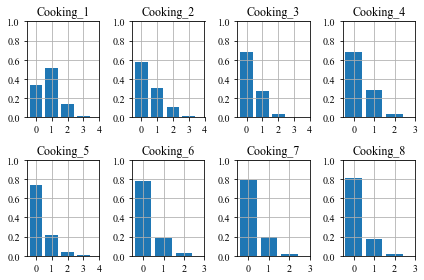

In [100]:
count=1
for i in list(sorted_dict.keys())[:8]:
    plt.subplot(2,4,count)
    time_dic = retrieve_daily_activity_prob(activity, i)
    plt_bar_dic(time_dic, title="Cooking_"+str(count))
    count+=1
    if count>9:
        break
plt.tight_layout()

In [101]:
# store the data into dic
count=1
daily_activation_pro = []
for i in list(sorted_dict.keys()):
    time_dic = retrieve_daily_activity_prob(activity, i)
    daily_activation_pro.append(time_dic)
    count+=1


In [102]:
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\daily_activation_pro.pkl', 'wb') as f:
    pickle.dump(daily_activation_pro, f)

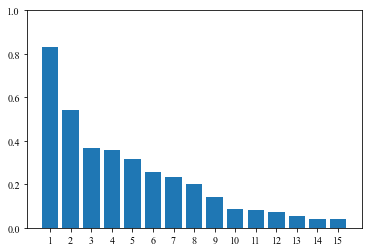

In [103]:
daily_probability=list(sorted_dict.values())
plt.bar(x=[i for i in range(1,len(daily_probability)+1)],height=np.array(daily_probability)/365)
plt.xticks([i for i in range(1,len(daily_probability)+1)])
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.show()

In [104]:
labels = np.array(labels)

In [105]:
kitchen_df = load_categories(file_path, [10,11,13,16,42], ["kettle", "toaster",'microwave',"breadmaker","gas oven"], 'active')

HDF5ExtError: HDF5 error back trace

  File "C:\ci\hdf5_1655191106204\work\src\H5F.c", line 620, in H5Fopen
    unable to open file
  File "C:\ci\hdf5_1655191106204\work\src\H5VLcallback.c", line 3502, in H5VL_file_open
    failed to iterate over available VOL connector plugins
  File "C:\ci\hdf5_1655191106204\work\src\H5PLpath.c", line 579, in H5PL__path_table_iterate
    can't iterate over plugins in plugin path '(null)'
  File "C:\ci\hdf5_1655191106204\work\src\H5PLpath.c", line 712, in H5PL__path_table_iterate_process_path
    can't open directory
  File "C:\ci\hdf5_1655191106204\work\src\H5VLcallback.c", line 3351, in H5VL__file_open
    open failed
  File "C:\ci\hdf5_1655191106204\work\src\H5VLnative_file.c", line 97, in H5VL__native_file_open
    unable to open file
  File "C:\ci\hdf5_1655191106204\work\src\H5Fint.c", line 1898, in H5F_open
    unable to lock the file
  File "C:\ci\hdf5_1655191106204\work\src\H5FD.c", line 1625, in H5FD_lock
    driver lock request failed
  File "C:\ci\hdf5_1655191106204\work\src\H5FDsec2.c", line 1002, in H5FD__sec2_lock
    unable to lock file, errno = 0, error message = 'No error', Win32 GetLastError() = 33

End of HDF5 error back trace

Unable to open/create file 'C:\annoticity-master (2)\anno\datasets\UK_DALE\ukdale.h5'

NameError: name 'kitchen_df' is not defined

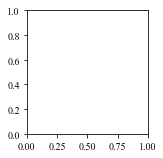

In [106]:
# breakfast -> 2 304


plt.figure(figsize=(10,5))
plt.subplot(2,4,1)
time = activity["cooking"][0]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.plot(grid="--")
plt.title("Cooking_1")
plt.xticks([])
plt.subplot(2,4,2)

# kettle ->>4 197
time = activity["cooking"][2]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.title("Cooking_2")

plt.xticks([])

#### Preparing for dinner 134
plt.subplot(2,4,3)
time = activity["cooking"][11]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.title("Cooking_3")

plt.xticks([])

# dinner 130
plt.subplot(2,4,4)
time = activity["cooking"][3]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.xticks([])
plt.title("Cooking_4")


# dinner 116
plt.subplot(2,4,5)
time = activity["cooking"][7]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.title("Cooking_5")

plt.xticks([])

# dinner 5 93
plt.subplot(2,4,6)
time = activity["cooking"][19]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.title("Cooking_6")

plt.xticks([])

# dinner 7 74
plt.subplot(2,4,7)
time = activity["cooking"][16]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.xticks([])
plt.title("Cooking_7")

# dinner 8 52
plt.subplot(2,4,8)
time = activity["cooking"][12]
start = time[0]
end = time[1]
for i in kitchen_df.columns:
    plt.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
    plt.grid("--")
plt.title("Cooking_8")
plt.xticks([])

plt.tight_layout()
plt.show()

NameError: name 'kitchen_df' is not defined

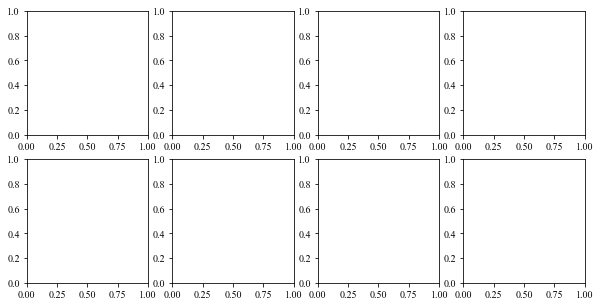

In [107]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(10,5))

# List of subplots titles and corresponding index
titles = ["Cooking_1", "Cooking_2", "Cooking_3", "Cooking_4",
          "Cooking_5", "Cooking_6", "Cooking_7", "Cooking_8"]

# Dictionary to store labels and their lines
labels = {}
time_lst = [0,2,11,3,7,19,16,12]
for idx, (time, title) in enumerate(zip(time_lst, titles)):
    ax = axs[idx // 4, idx % 4]  # Access the subplot
    start, end = activity["cooking"][time]
    for i in kitchen_df.columns:
        line, = ax.plot(kitchen_df[i][start:end].index, kitchen_df[i][start:end].values, label=i)
        if i not in labels:
            labels[i] = line  # Store the first line for each label
    ax.set_title(title)
    ax.grid("--")
    ax.set_xticks([])

# Adjust layout before adding legend
plt.tight_layout()

# Add a global legend at the top
fig.legend(handles=[labels[i] for i in labels], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(labels))

plt.show()

# 创建augmentation array

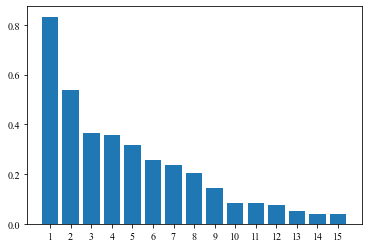

In [108]:
# 时间每天发生的次数
daily_probability=list(sorted_dict.values())
plt.bar(x=[i for i in range(1,len(daily_probability)+1)],height=np.array(daily_probability)/365)
plt.xticks([i for i in range(1,len(daily_probability)+1)])
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.plot(grid="--")

plt.show()

In [109]:
# 活动发生的时间

In [110]:
sorted_dict

{2: 304,
 4: 197,
 1: 134,
 3: 130,
 6: 116,
 5: 93,
 0: 86,
 7: 74,
 8: 52,
 9: 31,
 14: 30,
 11: 27,
 12: 19,
 10: 14,
 13: 14}

In [111]:
def get_label_prob(label, activity):
    start = np.array(activity["cooking"])[np.where(labels==label)[0]][:,0]
    hour_times = {}
    for i in range(0,24):
        hour_times[i] = 0
    for i in start:
        hour_times[i.hour]+=1
    array = np.array(list(hour_times.values()))
    activation_proba = array/sum(array)
    return activation_proba

In [112]:
# start time
count=1
start_time_lst = []
for i in list(sorted_dict.keys()):
    start_time = get_label_prob(i, activity)

    start_time_lst.append(start_time)
    count+=1

In [113]:
np.save(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\start_time_pro.npy',start_time_lst)

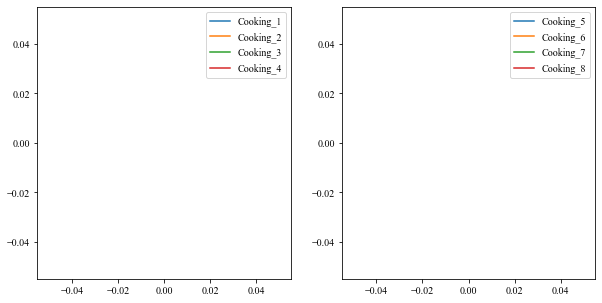

In [114]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
activity_1 = get_label_prob(2, activity)
plt.plot(activity_1, label="Cooking_1")

plt.plot(grid="--")
activity_2 = get_label_prob(4, activity)
plt.plot(activity_2, label="Cooking_2")
plt.plot(grid="--")

activity_3 = get_label_prob(1, activity)
plt.plot(activity_3, label="Cooking_3")

activity_4 = get_label_prob(3, activity)
plt.plot(activity_4, label="Cooking_4")
plt.plot(grid="--")
plt.legend()


plt.subplot(1,2,2)
activity_5 = get_label_prob(6, activity)
plt.plot(activity_5, label="Cooking_5")
plt.plot(grid="--")

activity_6 = get_label_prob(5, activity)
plt.plot(activity_6, label="Cooking_6")
plt.plot(grid="--")

activity_7 = get_label_prob(0, activity)
plt.plot(activity_7, label="Cooking_7")

activity_8 = get_label_prob(7, activity)
plt.plot(activity_8, label="Cooking_8")
plt.plot(grid="--")

plt.legend()
plt.show()

# 各活动持续时间

In [115]:
test = np.array(activity["cooking"])[np.where(labels==2)[0]]

In [116]:
(end - start).seconds//60

87

In [117]:
def get_duration_prob(label, activity):
    activity = np.array(activity["cooking"])[np.where(labels==label)[0]]
    duration_lst = []

    for start, end in activity:
        duration = (end - start).seconds//60
        duration_lst.append(duration)
    return duration_lst

In [118]:
# start time
count=1
duration_lst = []
for i in list(sorted_dict.keys()):
    duration = get_duration_prob(i, activity)
    duration_lst.append(duration)
    count+=1

In [119]:
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\duration_lst.pkl', 'wb') as f:
    pickle.dump(duration_lst, f)

## 各用电器在活动内的使用次数

In [120]:
activity = list(sorted_dict.keys())

In [121]:
stats[-4]["appliance_open_count"]

{'kettle': 1, 'breadmaker': 0, 'gas': 0, 'microwave': 3, 'toaster': 0}

In [122]:
appliance_name_lst = ["kettle","breadmaker","gas","microwave","toaster"]

In [149]:
labels = np.load("labels.npy")


In [150]:
# 各用电器使用次数
appliance_use_time = {}
def retrieve_appliance_activation_prob(stats, labels,appliance_name_lst, label):
    appliance_open_count_lst = [stats[i]['appliance_open_count'] for i in np.where(labels==label)[0]]
    appliance_count_lst = [list(i.values()) for i in appliance_open_count_lst]
    appliance_count_lst = np.array(appliance_count_lst)
    appliance_level_dic = {}
    df = pd.DataFrame(data=np.array(appliance_count_lst),columns=appliance_name_lst)
    for name in appliance_name_lst:
        appliance_count = Counter(df.loc[:,name])
        appliance_count = {k: appliance_count[k] for k in sorted(appliance_count)}
        temp = {}
        for time, prob in appliance_count.items():
            temp[time] = prob/sum(appliance_count.values())
        appliance_level_dic[name] = temp
    return appliance_level_dic
activity_activation_prob = retrieve_appliance_activation_prob(stats, labels, appliance_name_lst, 9)

In [151]:
[stats[i]['appliance_open_count'] for i in np.where(labels==9)[0]]

[{'kettle': 4, 'breadmaker': 0, 'gas': 1, 'microwave': 0, 'toaster': 0},
 {'kettle': 1, 'breadmaker': 12, 'gas': 1, 'microwave': 0, 'toaster': 0},
 {'kettle': 1, 'breadmaker': 0, 'gas': 1, 'microwave': 0, 'toaster': 0},
 {'kettle': 1, 'breadmaker': 0, 'gas': 1, 'microwave': 0, 'toaster': 0},
 {'kettle': 2, 'breadmaker': 0, 'gas': 1, 'microwave': 0, 'toaster': 0},
 {'kettle': 1, 'breadmaker': 0, 'gas': 1, 'microwave': 0, 'toaster': 0},
 {'kettle': 1, 'breadmaker': 0, 'gas': 1, 'microwave': 0, 'toaster': 0},
 {'kettle': 1, 'breadmaker': 0, 'gas': 1, 'microwave': 0, 'toaster': 0},
 {'kettle': 1, 'breadmaker': 0, 'gas': 1, 'microwave': 0, 'toaster': 0},
 {'kettle': 2, 'breadmaker': 0, 'gas': 1, 'microwave': 0, 'toaster': 0},
 {'kettle': 1, 'breadmaker': 0, 'gas': 1, 'microwave': 0, 'toaster': 0},
 {'kettle': 1, 'breadmaker': 0, 'gas': 1, 'microwave': 0, 'toaster': 0},
 {'kettle': 1, 'breadmaker': 0, 'gas': 1, 'microwave': 0, 'toaster': 0},
 {'kettle': 1, 'breadmaker': 0, 'gas': 1, 'microwa

In [152]:
activity_activation_prob

{'kettle': {1: 0.7741935483870968,
  2: 0.12903225806451613,
  3: 0.03225806451612903,
  4: 0.06451612903225806},
 'breadmaker': {0: 0.967741935483871, 12: 0.03225806451612903},
 'gas': {1: 1.0},
 'microwave': {0: 1.0},
 'toaster': {0: 1.0}}

In [153]:
activity_activation_prob_dic = {}
for i in list(sorted_dict.keys())[0:8]:
    activity_activation_prob_dic[i] = retrieve_appliance_activation_prob(stats, labels, appliance_name_lst, i)

In [154]:
activity_activation_prob

{'kettle': {1: 0.7741935483870968,
  2: 0.12903225806451613,
  3: 0.03225806451612903,
  4: 0.06451612903225806},
 'breadmaker': {0: 0.967741935483871, 12: 0.03225806451612903},
 'gas': {1: 1.0},
 'microwave': {0: 1.0},
 'toaster': {0: 1.0}}

In [155]:
activity_appliance_activation_times = []
for i in list(sorted_dict.keys()):
    activity_appliance_activation_times.append(retrieve_appliance_activation_prob(stats, labels, appliance_name_lst, i))

In [156]:
activity_appliance_activation_times

[{'kettle': {1: 0.3848684210526316,
   2: 0.47039473684210525,
   3: 0.12171052631578948,
   4: 0.019736842105263157,
   5: 0.003289473684210526},
  'breadmaker': {0: 1.0},
  'gas': {0: 1.0},
  'microwave': {1: 0.5263157894736842,
   2: 0.35526315789473684,
   3: 0.10526315789473684,
   4: 0.009868421052631578,
   5: 0.003289473684210526},
  'toaster': {1: 0.5855263157894737,
   2: 0.34868421052631576,
   3: 0.0625,
   4: 0.003289473684210526}},
 {'kettle': {1: 0.8071065989847716,
   2: 0.15228426395939088,
   3: 0.030456852791878174,
   4: 0.005076142131979695,
   6: 0.005076142131979695},
  'breadmaker': {0: 1.0},
  'gas': {0: 1.0},
  'microwave': {0: 1.0},
  'toaster': {0: 1.0}},
 {'kettle': {1: 0.5671641791044776,
   2: 0.2835820895522388,
   3: 0.08955223880597014,
   4: 0.05223880597014925,
   6: 0.007462686567164179},
  'breadmaker': {0: 1.0},
  'gas': {0: 1.0},
  'microwave': {1: 0.5447761194029851,
   2: 0.291044776119403,
   3: 0.12686567164179105,
   4: 0.014925373134328358,

In [157]:
activity_appliance_activation_times[8]

{'kettle': {0: 1.0},
 'breadmaker': {0: 1.0},
 'gas': {0: 1.0},
 'microwave': {1: 0.5961538461538461,
  2: 0.28846153846153844,
  3: 0.057692307692307696,
  5: 0.019230769230769232,
  6: 0.038461538461538464},
 'toaster': {1: 0.7115384615384616,
  2: 0.2692307692307692,
  3: 0.019230769230769232}}

In [158]:
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\activity_appliance_activation_times.pkl', 'wb') as f:
    pickle.dump(activity_appliance_activation_times, f)

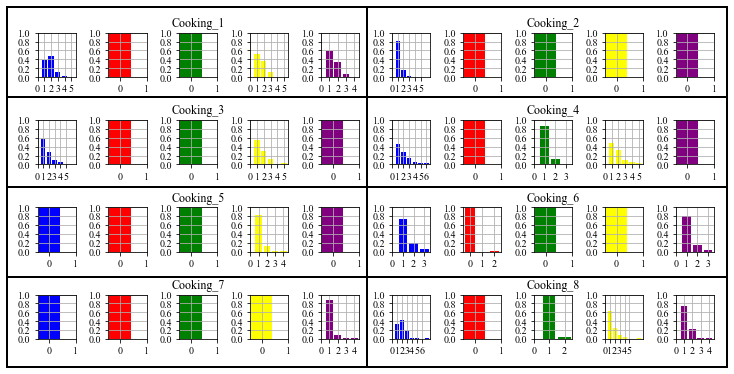

In [159]:
import matplotlib.patches as patches
appliance_color = {'kettle':'blue','breadmaker':'red',"gas":"green","microwave":'yellow','toaster':"purple"}
def plot_appliance_frequencies(data):

    fig, axes = plt.subplots(4, 10, figsize=(10, 5))
    titles = [f'Cooking_{i + 1}' for i in range(8)]
    appliances = ["kettle", "breadmaker", "gas", "microwave", "toaster"]
    title_index = 1

    for i in range(0,4):
        ax = axes[i,2]
        ax.set_title("Cooking_{}".format(title_index))
        title_index+=1
        ax = axes[i,7]
        ax.set_title("Cooking_{}".format(title_index))
        title_index+=1
    for i, (title_index, cooking_data) in enumerate(data.items()):
        row = i//2
        for j, appliance in enumerate(appliances):
            ax = axes[row, j+(i%2)*5]
            freq = cooking_data.get(appliance, {})
            ax.bar(list(freq.keys()), list(freq.values()),color = appliance_color[appliance])
            ax.set_xticks(range(0,len(freq.values())+1))
            ax.set_yticks([i*0.1 for i in range(0,12,2)])
            # ax.set_title(f'{appliance}')
            ax.set_ylim(0, 1)
            ax.grid("--")
    # 创建一个黑色矩形边框，包含第0行第1列和第0行第2列的子图
    rect = patches.Rectangle((0, 0), 0.5, 0.25, linewidth=2, edgecolor='black', facecolor='none', transform=fig.transFigure)
    fig.patches.append(rect)

    rect = patches.Rectangle((0, 0.25), 0.5, 0.25, linewidth=2, edgecolor='black', facecolor='none', transform=fig.transFigure)
    # 在图上添加矩形
    fig.patches.append(rect)
    for i in range(0,100,25):
        rect = patches.Rectangle((0, i*0.01), 0.5, 0.25, linewidth=2, edgecolor='black', facecolor='none', transform=fig.transFigure)
        fig.patches.append(rect)
    for i in range(0,100,25):
        rect = patches.Rectangle((0.5, i*0.01), 0.5, 0.25, linewidth=2, edgecolor='black', facecolor='none', transform=fig.transFigure)
        fig.patches.append(rect)

    plt.tight_layout()  # Adjust layout to make room for suptitle
    plt.savefig("appliance.jpg")
    plt.show()
data = activity_activation_prob_dic
plot_appliance_frequencies(data)

## 使用时间的相对位置

In [160]:
#  画出事件开始时间的概率分布
time_slot = [round(i*0.1,1) for i in range(0,10,1)]

In [161]:
activity_path = r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\activity_120'

activity = load_activity_dic(activity_path, ['cooking','cleaning','entertainment',"working"])

In [162]:
activity_time = [activity["cooking"][i] for i in list(np.where(np.array(labels)==2)[0])]

In [163]:
[activity["cooking"][i] for i in list(np.where(np.array(labels)==8)[0])]

[(Timestamp('2013-05-03 19:53:30', freq='30S'),
  Timestamp('2013-05-03 20:32:00', freq='30S')),
 (Timestamp('2013-05-06 18:27:00', freq='30S'),
  Timestamp('2013-05-06 19:28:30', freq='30S')),
 (Timestamp('2013-05-16 18:27:30', freq='30S'),
  Timestamp('2013-05-16 18:37:00', freq='30S')),
 (Timestamp('2013-05-17 18:55:00', freq='30S'),
  Timestamp('2013-05-17 19:14:00', freq='30S')),
 (Timestamp('2013-05-31 18:19:30', freq='30S'),
  Timestamp('2013-05-31 18:48:30', freq='30S')),
 (Timestamp('2013-06-02 18:28:30', freq='30S'),
  Timestamp('2013-06-02 18:59:30', freq='30S')),
 (Timestamp('2013-06-03 18:16:30', freq='30S'),
  Timestamp('2013-06-03 18:40:00', freq='30S')),
 (Timestamp('2013-06-04 16:58:00', freq='30S'),
  Timestamp('2013-06-04 18:32:30', freq='30S')),
 (Timestamp('2013-06-09 20:47:00', freq='30S'),
  Timestamp('2013-06-09 21:14:00', freq='30S')),
 (Timestamp('2013-06-26 20:54:30', freq='30S'),
  Timestamp('2013-06-26 21:07:00', freq='30S')),
 (Timestamp('2013-06-28 16:46:

In [164]:
from datetime import datetime
from typing import List, Tuple, Dict

def retrieve_proportion(activity, appliance_time_dic, label):
    activity_time = [activity["cooking"][i] for i in list(np.where(np.array(labels)==label)[0])]
    # 初始化一个空列表来存储每个活动的统计信息
    appliance_name_lst = ["kettle","breadmaker","gas","microwave","toaster"]
    info = {}
    temp_dic = {}
    time_slot = [round(i*0.1,1) for i in range(0,10,1)]
    for i in time_slot:
        temp_dic[i] = 0
    for appliance_name in appliance_name_lst:
        info[appliance_name] = temp_dic.copy()

    # 遍历每个活动
    for start, end in activity_time:
        # 遍历每个用电器
        for appliance, times in appliance_time_dic.items():
            try:
                activity_lst = times[start.date()]
                # 遍历每个用电器的使用时间
                for time_start, time_end in activity_lst:
                    if start<=time_start<=end:
                        whole_time = (end-start).total_seconds()
                        start_time = (time_start-start).total_seconds()
                        proportion = round(start_time/whole_time,1)
                        info[appliance][proportion]+=1
            except Exception:
                pass
    temp = {}
    for appliance_name, dic in info.items():
        if sum(dic.values()) == 0:
            temp[appliance_name] = np.array(list(dic.values()))
        else:
            prob = np.array(list(dic.values()))/sum(dic.values())
            temp[appliance_name] = prob
    return temp

info = retrieve_proportion(activity,appliance_time_dic, 9)

In [165]:
info

{'kettle': array([0.40540541, 0.08108108, 0.05405405, 0.02702703, 0.05405405,
        0.05405405, 0.13513514, 0.08108108, 0.05405405, 0.05405405]),
 'breadmaker': array([0.08333333, 0.08333333, 0.16666667, 0.08333333, 0.25      ,
        0.25      , 0.08333333, 0.        , 0.        , 0.        ]),
 'gas': array([0.70967742, 0.12903226, 0.03225806, 0.        , 0.03225806,
        0.03225806, 0.        , 0.03225806, 0.        , 0.03225806]),
 'microwave': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'toaster': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [166]:
retrieve_proportion(activity, appliance_time_dic, 9)

{'kettle': array([0.40540541, 0.08108108, 0.05405405, 0.02702703, 0.05405405,
        0.05405405, 0.13513514, 0.08108108, 0.05405405, 0.05405405]),
 'breadmaker': array([0.08333333, 0.08333333, 0.16666667, 0.08333333, 0.25      ,
        0.25      , 0.08333333, 0.        , 0.        , 0.        ]),
 'gas': array([0.70967742, 0.12903226, 0.03225806, 0.        , 0.03225806,
        0.03225806, 0.        , 0.03225806, 0.        , 0.03225806]),
 'microwave': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'toaster': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [167]:
activation_proba = {}
for i in list(sorted_dict.keys())[:8]:
    info = retrieve_proportion(activity, appliance_time_dic, i)
    activation_proba[i] = info


In [168]:
activation_proba[2]

{'kettle': array([0.4852071 , 0.05325444, 0.06903353, 0.05128205, 0.04930966,
        0.06508876, 0.05128205, 0.05719921, 0.07100592, 0.04733728]),
 'breadmaker': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'gas': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'microwave': array([0.18731118, 0.12084592, 0.08459215, 0.09667674, 0.10574018,
        0.05438066, 0.04833837, 0.09969789, 0.10574018, 0.09667674]),
 'toaster': array([0.14449541, 0.10550459, 0.10091743, 0.10321101, 0.09633028,
        0.05963303, 0.07110092, 0.05733945, 0.10779817, 0.15366972])}

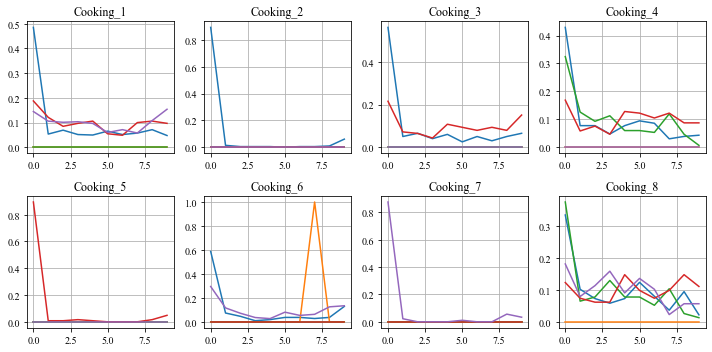

In [169]:
activation_proba = {}
count = 1
plt.figure(figsize=(10,5))
for i in list(sorted_dict.keys())[:8]:
    plt.subplot(2,4, count)
    info = retrieve_proportion(activity, appliance_time_dic, i)
    df = pd.DataFrame(info)
    plt.plot(df)
    plt.grid("--")
    plt.title("Cooking_"+str(count))
    count+=1
plt.tight_layout()


In [170]:
appliance_start_proba = []
for i in list(sorted_dict.keys()):
    info = retrieve_proportion(activity, appliance_time_dic, i)
    appliance_start_proba.append(info)

In [171]:
appliance_start_proba[8]

{'kettle': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'breadmaker': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'gas': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'microwave': array([0.40983607, 0.04918033, 0.06557377, 0.04918033, 0.01639344,
        0.03278689, 0.06557377, 0.09836066, 0.06557377, 0.14754098]),
 'toaster': array([0.50819672, 0.06557377, 0.09836066, 0.03278689, 0.03278689,
        0.04918033, 0.01639344, 0.04918033, 0.03278689, 0.1147541 ])}

In [172]:
with open(r'C:\Users\ASUS\Desktop\Few-shot NILM (2)\activity_annotation\stochastic model\appliance_start_proba.pkl', 'wb') as f:
    pickle.dump(appliance_start_proba, f)

In [173]:
appliance_start_proba[2]

{'kettle': array([0.56281407, 0.05025126, 0.06532663, 0.04020101, 0.06030151,
        0.02512563, 0.05025126, 0.03015075, 0.05025126, 0.06532663]),
 'breadmaker': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'gas': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'microwave': array([0.21582734, 0.07194245, 0.0647482 , 0.04316547, 0.10791367,
        0.09352518, 0.07913669, 0.09352518, 0.07913669, 0.15107914]),
 'toaster': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}